Exploring missing data

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
file_path = 'food_crises_cleaned.csv'
df = pd.read_csv(file_path)

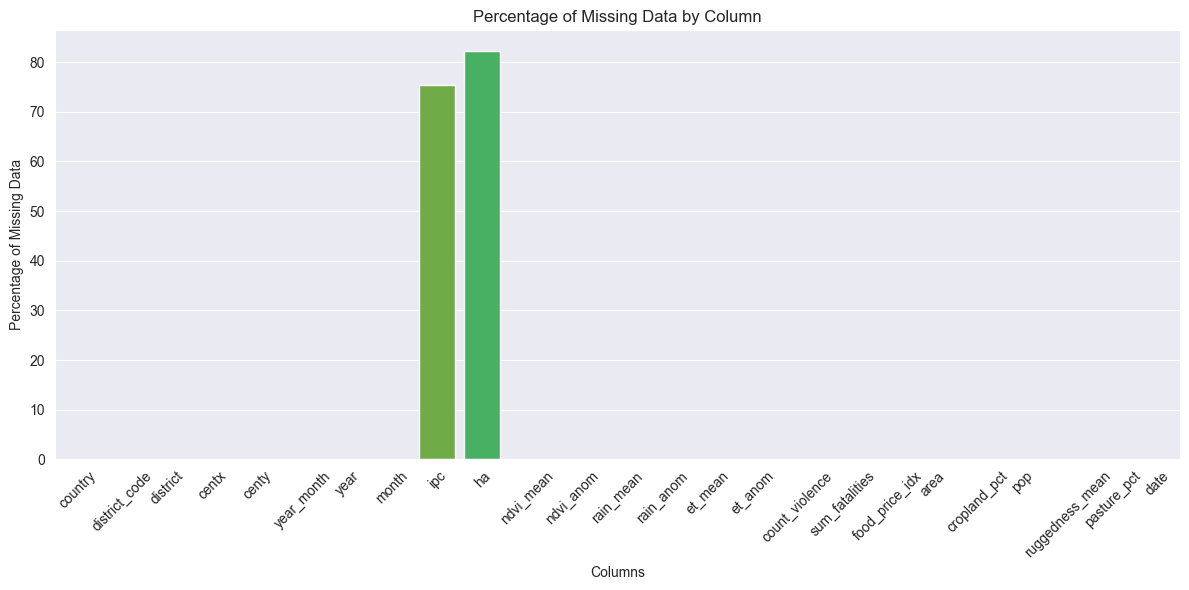

In [75]:
# Calculate the percentage of missing data for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Plot the missing data percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Data')
plt.title('Percentage of Missing Data by Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot above shows that approximately 75% of IPC data is missing and 80% of humanitarian assitance is missing

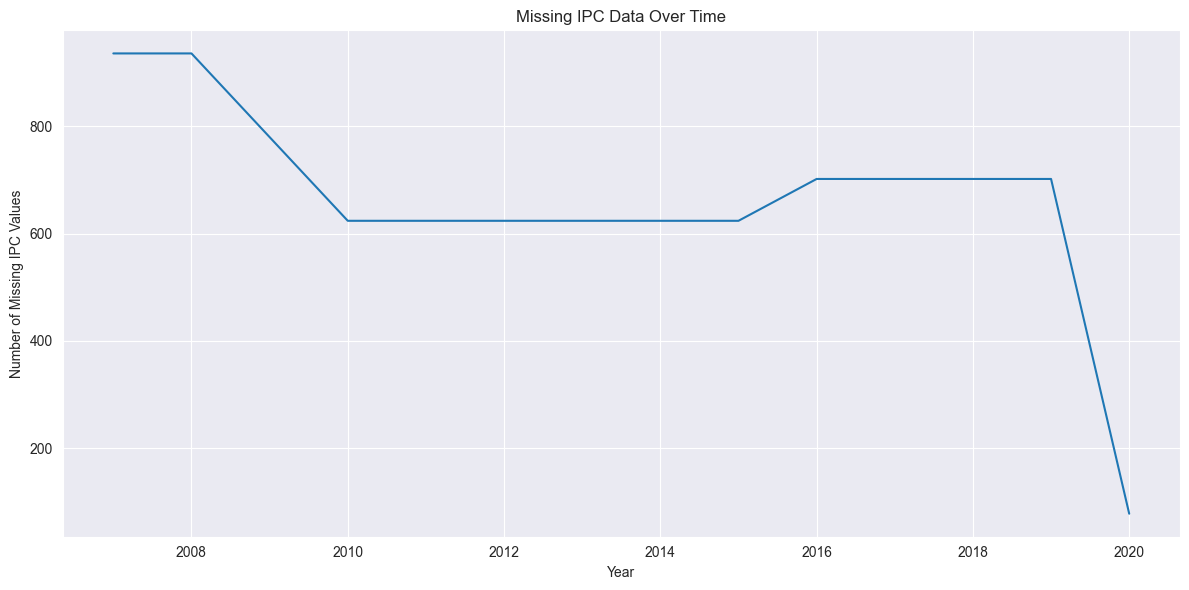

In [76]:
# Check missing data pattern for a specific column (e.g., 'IPC')
# Assuming 'IPC' is the column containing IPC data
ipc_missing_pattern = df['ipc'].isnull().sum()

# Analyze the pattern further, consider time-based analysis
# Example: Check if missing data has a pattern linearly with time
# Assuming a time-related column (e.g., 'date')
# Replace 'date' with the actual time-related column in dataset
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Group by year and count missing IPC values for each year
missing_by_year = df.groupby('year')['ipc'].apply(lambda x: x.isnull().sum())

# Plot the missing data pattern over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=missing_by_year.index, y=missing_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Missing IPC Values')
plt.title('Missing IPC Data Over Time')
plt.tight_layout()
plt.show()

The above graph shows missing data for the IPC values over the years. The graph shows a non-linear trend. Given below is the same exploration but for every 3 months, instead of a very so that we get a more granular picture:

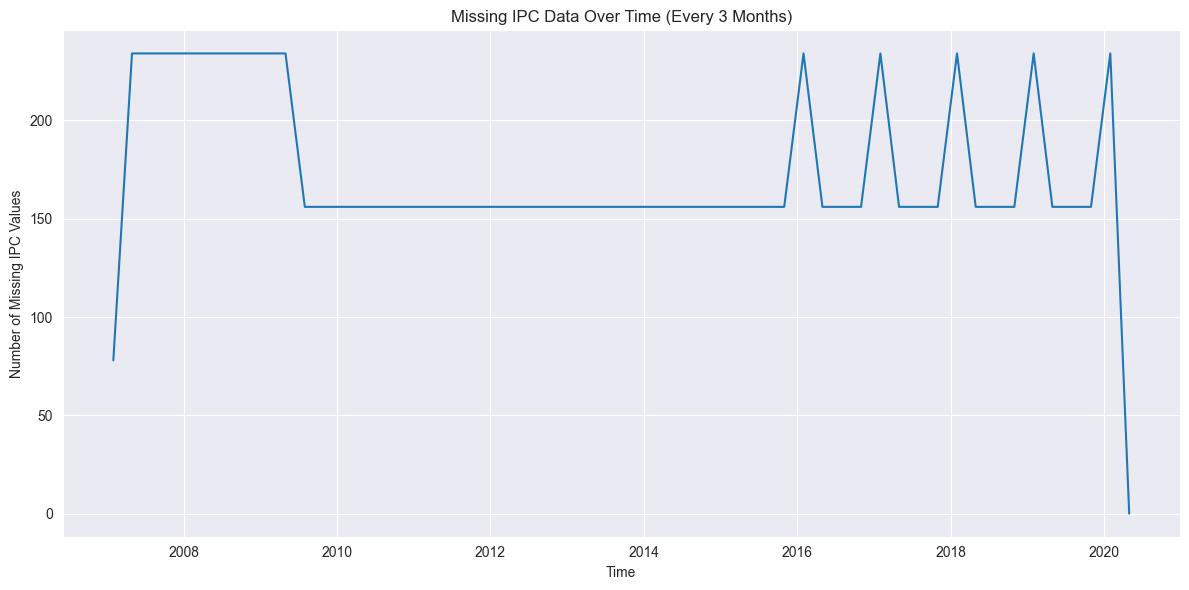

In [77]:
ipc_column = 'ipc'

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Resample data to 3-month intervals and count missing IPC values for each interval
missing_by_3months = df[ipc_column].resample('3M').apply(lambda x: x.isnull().sum())

# Plot the missing data pattern over time for every 3 months
plt.figure(figsize=(12, 6))
sns.lineplot(x=missing_by_3months.index, y=missing_by_3months.values)
plt.xlabel('Time')
plt.ylabel('Number of Missing IPC Values')
plt.title('Missing IPC Data Over Time (Every 3 Months)')
plt.tight_layout()
plt.show()


There seem to be significant differences between the graphs for each year VS over every 3 months. Not sure why this is happening and what is causing it but maybe there are short-Term Fluctuations: Analyzing missing data at a more granular level, such as every 3 months, can reveal short-term fluctuations or anomalies that might not be apparent in a yearly analysis. These fluctuations could be related to specific events, changes in data collection procedures, or other short-term factors affecting data reporting.

If the patterns are significantly different, it's essential to investigate the underlying reasons for these differences. Understanding the context of the data, data collection methodologies, external events, or changes in reporting practices can provide insights into why the missing data patterns vary at different time scales

Creating a correlation heatmap requires having numerical data, and it's typically used to visualize the correlation between numerical features in a dataset. By doing this, I am trying to find how strongly the presence or absence of one variable (IPC) affects the presence of another.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
file_path = 'food_crises_cleaned.csv'
df = pd.read_csv(file_path)

# Select columns with numerical data types
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the numerical column names
print("Numerical columns:")
print(numerical_columns)


Numerical columns:
Index(['district_code', 'centx', 'centy', 'year', 'month', 'ipc', 'ha',
       'ndvi_mean', 'ndvi_anom', 'rain_mean', 'rain_anom', 'et_mean',
       'et_anom', 'count_violence', 'sum_fatalities', 'food_price_idx', 'area',
       'cropland_pct', 'pop', 'ruggedness_mean', 'pasture_pct'],
      dtype='object')


From all the numerical columns, choosing the following for the correlation heatmap:
district_code, year, month, ipc, ha, ndvi_mean, ndvi_anom, rain_mean, rain_anom, count_violence, food_price_idx, pop, sum_fatalities

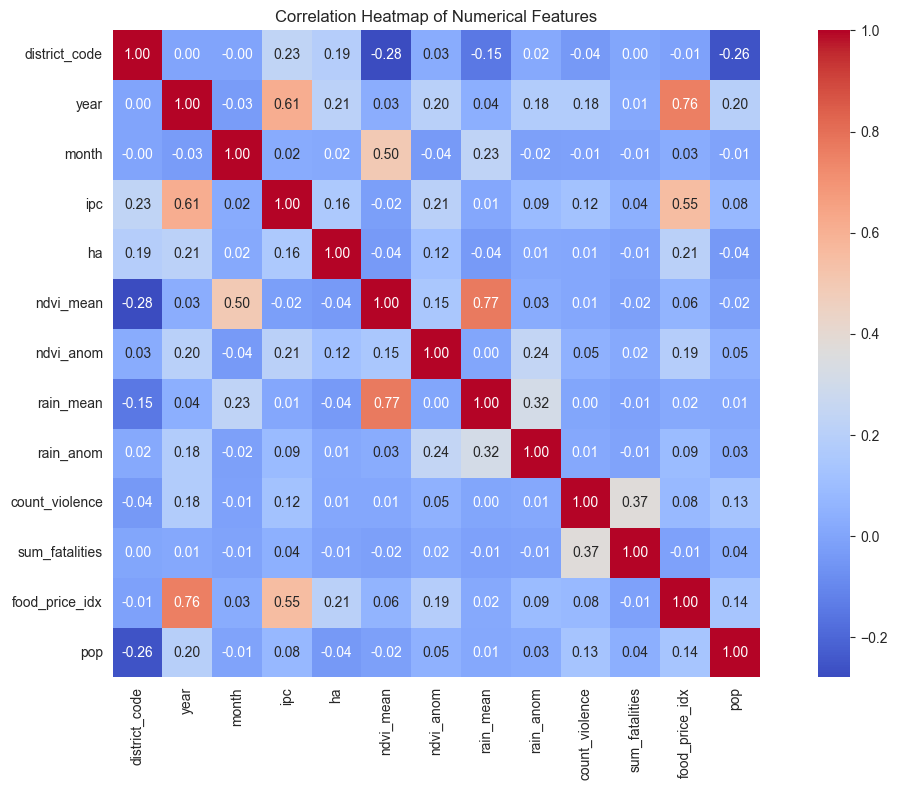

In [79]:
# Assuming you have numerical columns other than 'IPC'
# Replace with the actual numerical columns from your dataset
numerical_columns = ['district_code', 'year', 'month', 'ipc', 'ha',
       'ndvi_mean', 'ndvi_anom', 'rain_mean', 'rain_anom', 'count_violence', 'sum_fatalities', 'food_price_idx', 'pop']

# Subset the DataFrame to include only numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


Correlation of IPC with district-code: 0.23 ->positive but relatively weak correlation

Correlation of IPC with year: 0.61 ->strong postive correlation, suggesting a general upward trend or a time-related pattern.

Correlation of IPC with month: 0.02 ->a very weak positive correlation, little to no discernible monthly pattern in IPC values.

Correlation of IPC with ipc: 1 ->expected

Correlation of IPC with humanitarian aid: 0.16 ->positive but relatively weak correlation

Correlation of IPC with ndvi_mean: -0.02 ->very weak negative correlation, little to no linear relationship between these two variables.

Correlation of IPC with ndvi_anomalies: 0.21 ->positive but relatively weak correlation

Correlation of IPC with rain-mean: 0.01 ->weak positive correlation

Correlation of IPC with rain-anomalies: 0.09 ->positive but relatively weak correlation

Correlation of IPC with count_violence: 0.12 ->positive but relatively weak correlation

Correlation of IPC with sum_fatalities: 0.04 ->positive but relatively weak correlation

Correlation of IPC with food_price_index: 0.55 ->strong positive correlation, indicates that as the food price index increases, IPC also tends to increase, suggesting a strong relationship between food prices and food security.

Correlation of IPC with population: 0.08 ->very weak positive correlation, little to no linear relationship between IPC and the population size of the region.



**Those metric worth looking at from the exploration above are district code, year, ha, food-price-index**
I will explore food price index with the following approach:
1. find trend for food price index over the years
2. mine news articles for why it behaves the way it does (goes up linearly, patterns, trends, etc)
3. use SLE angles to justify and gives us a direction for further reserach

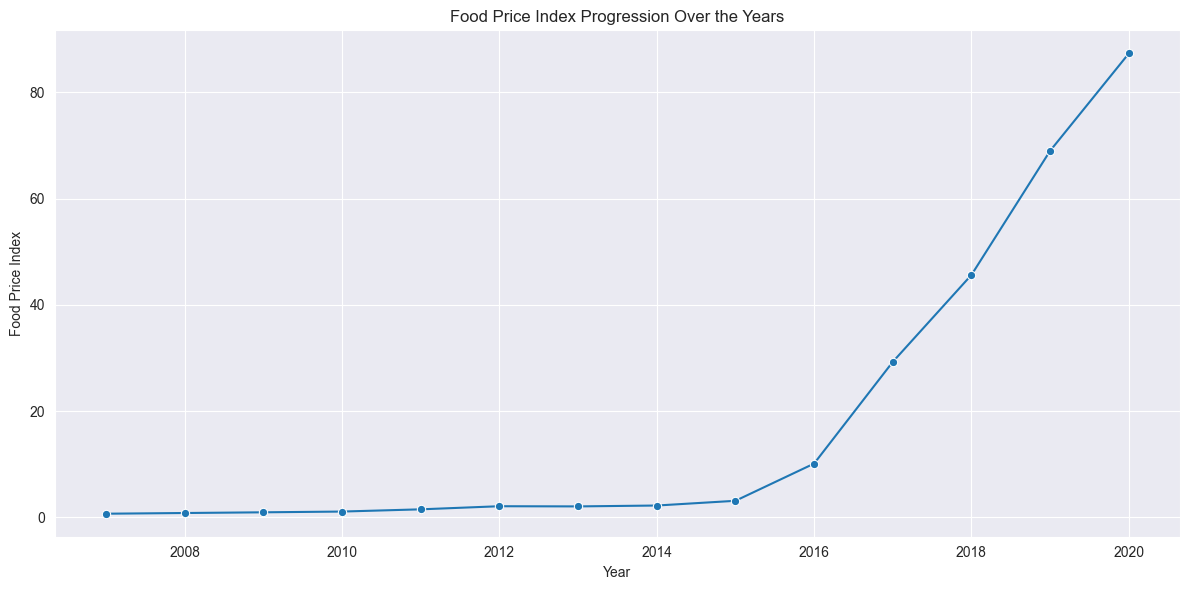

In [80]:
food_price_column = 'food_price_idx'

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and calculate the mean food price index for each year
food_price_by_year = df.groupby('year')[food_price_column].mean()

# Plot the food price index over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=food_price_by_year.index, y=food_price_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Food Price Index')
plt.title('Food Price Index Progression Over the Years')
plt.tight_layout()
plt.show()

Look for indicators as to why the food prices have been exponentially escalating since 2015 by mining the news articles, using external news data, and carrying out research